In [2]:
!pip install numpy scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


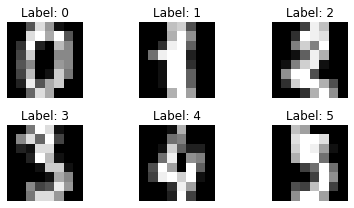

Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.98      1.00      0.99        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



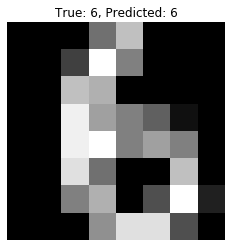

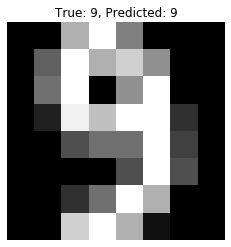

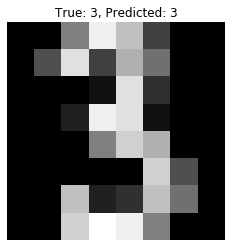

Predicted digit for custom input: 0


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load digits dataset (8x8 images of digits 0-9)
digits = load_digits()

# Show sample digits
plt.figure(figsize=(6,3))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Prepare features and labels
X = digits.data    # 1797 samples, 64 features each (8x8 images flattened)
y = digits.target  # Labels 0-9

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Predict on test set
y_pred = mlp.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize predictions on some test samples
for i in range(3):
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()

# --------------------------------------------------------
# Custom input test example (uncomment to test your own digit)

my_digit = np.array([
    [0, 0, 5, 8, 8, 5, 0, 0],
    [0, 5, 8, 0, 0, 8, 5, 0],
    [5, 8, 0, 0, 0, 0, 8, 5],
    [5, 8, 0, 0, 0, 0, 8, 5],
    [5, 8, 0, 0, 0, 0, 8, 5],
    [0, 5, 8, 0, 0, 8, 5, 0],
    [0, 0, 5, 8, 8, 5, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
])
my_digit_flat = my_digit.flatten().reshape(1, -1)
predicted = mlp.predict(my_digit_flat)
print("Predicted digit for custom input:", predicted[0])
